# 1. Instalowanie zależności 

In [21]:
!pip install tensorflow

In [22]:
!pip install opencv-python

In [23]:
!pip install matplotlib

In [24]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.2.0
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backpor

In [25]:
import tensorflow as tf
import os

# 2. Usuwanie nieporządanych formatów i uszkodzonych obrazów

In [26]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [27]:
data_dir = 'data' 

In [28]:
os.listdir(data_dir)

['CHORZY', 'ZDROWI']

In [29]:
imgage_ext = ['jpg', 'jpeg', 'png', 'bmp']

In [30]:
os.listdir(data_dir)

['CHORZY', 'ZDROWI']

In [31]:

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Rozszerzenie nie zawarte w liście dozwolonych {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Problem z otwarcie obrazka {}'.format(image_path))
            # os.remove(image_path)

Problem z otwarcie obrazka data\CHORZY\person1000_bacteria_2931.jpeg
Problem z otwarcie obrazka data\CHORZY\person1000_virus_1681.jpeg
Problem z otwarcie obrazka data\CHORZY\person1001_bacteria_2932.jpeg
Problem z otwarcie obrazka data\CHORZY\person1002_bacteria_2933.jpeg
Problem z otwarcie obrazka data\CHORZY\person1003_bacteria_2934.jpeg
Problem z otwarcie obrazka data\CHORZY\person1003_virus_1685.jpeg
Problem z otwarcie obrazka data\CHORZY\person1004_bacteria_2935.jpeg
Problem z otwarcie obrazka data\CHORZY\person1004_virus_1686.jpeg
Problem z otwarcie obrazka data\CHORZY\person1005_bacteria_2936.jpeg
Problem z otwarcie obrazka data\CHORZY\person1005_virus_1688.jpeg
Problem z otwarcie obrazka data\CHORZY\person1006_bacteria_2937.jpeg
Problem z otwarcie obrazka data\CHORZY\person1007_bacteria_2938.jpeg
Problem z otwarcie obrazka data\CHORZY\person1007_virus_1690.jpeg
Problem z otwarcie obrazka data\CHORZY\person1008_bacteria_2939.jpeg
Problem z otwarcie obrazka data\CHORZY\person1008

In [35]:
img = cv2.imread(os.path.join('data',  'CHORZY' , 'person1_bacteria_1.jpeg'))

In [36]:
img.shape

(439, 712, 3)

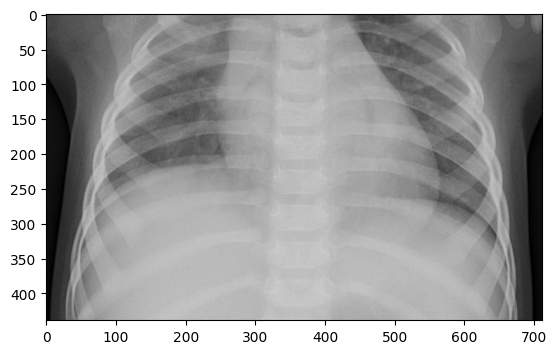

In [37]:
plt.imshow(img)

# 3. Ładowanie danych

In [148]:
import numpy as np
from matplotlib import pyplot as plt

In [149]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 5216 files belonging to 2 classes.


In [150]:
data_iterator = data.as_numpy_iterator()

In [151]:
data_iterator

In [152]:
batch = data_iterator.next()

In [153]:
len(batch)

2

In [154]:
batch

(array([[[[199.14844 , 199.14844 , 199.14844 ],
          [200.01953 , 200.01953 , 200.01953 ],
          [199.83789 , 199.83789 , 199.83789 ],
          ...,
          [ 71.83008 ,  71.83008 ,  71.83008 ],
          [ 87.73047 ,  87.73047 ,  87.73047 ],
          [ 95.02734 ,  95.02734 ,  95.02734 ]],
 
         [[203.16797 , 203.16797 , 203.16797 ],
          [197.32031 , 197.32031 , 197.32031 ],
          [197.35742 , 197.35742 , 197.35742 ],
          ...,
          [ 83.271484,  83.271484,  83.271484],
          [ 76.49805 ,  76.49805 ,  76.49805 ],
          [ 85.916016,  85.916016,  85.916016]],
 
         [[205.42969 , 205.42969 , 205.42969 ],
          [194.83398 , 194.83398 , 194.83398 ],
          [195.1875  , 195.1875  , 195.1875  ],
          ...,
          [ 72.4707  ,  72.4707  ,  72.4707  ],
          [ 95.13867 ,  95.13867 ,  95.13867 ],
          [ 93.84766 ,  93.84766 ,  93.84766 ]],
 
         ...,
 
         [[ 35.93164 ,  35.93164 ,  35.93164 ],
          [ 19.312

In [155]:
batch[0].shape

(32, 256, 256, 3)

In [156]:
#klasa 0 - CHORZY
#klasa 1 - ZDROWI
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

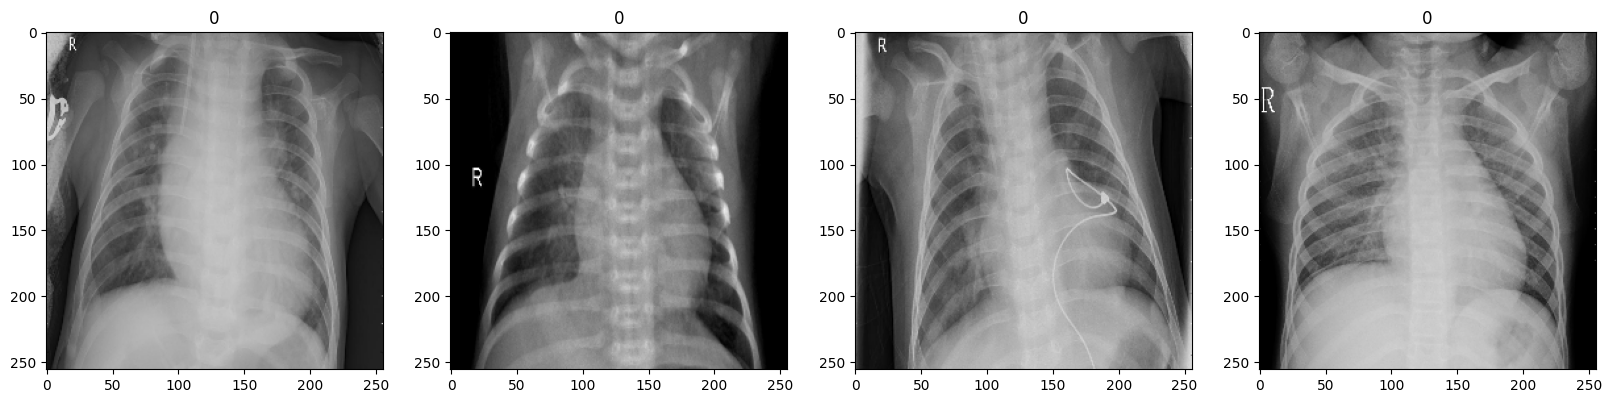

In [157]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Skalowanie danych

In [158]:
data = data.map(lambda x,y: (x/255, y))

In [159]:
batch[0].min()

0.0

In [160]:
batch[0].max()

255.0

In [161]:
scaled_iterator = data.as_numpy_iterator()

In [162]:
batch = scaled_iterator.next()

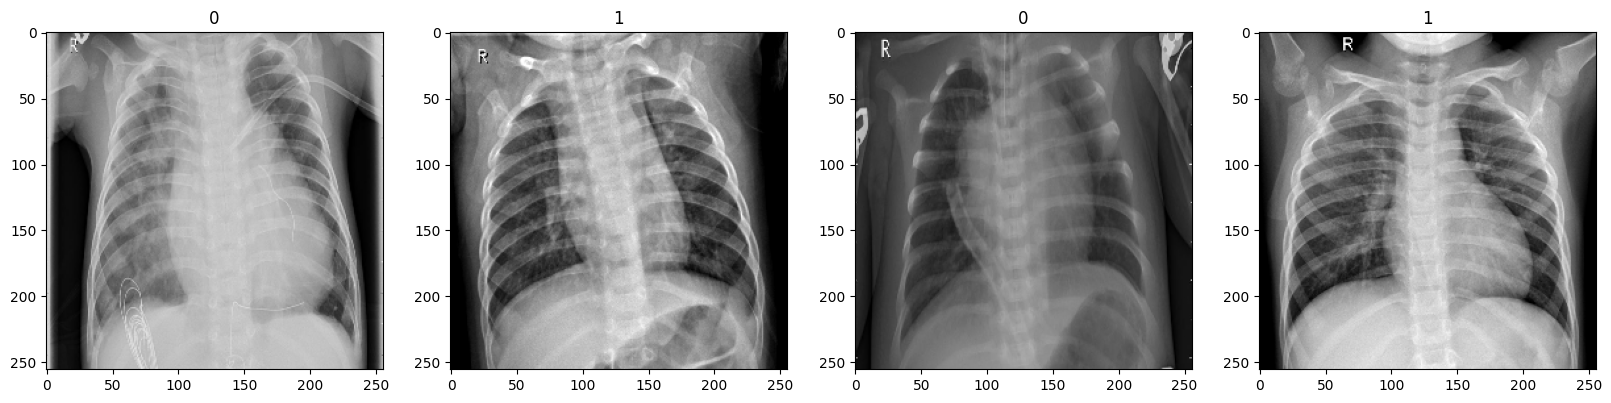

In [163]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [165]:
scaled_iterator.next()[0].max()

1.0

In [167]:
scaled_iterator.next()[0].min()

0.0

# 5. Podział na zbiory

In [168]:
len(data)

163

In [169]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [170]:
train_size

114

In [171]:
val_size

32

In [172]:
test_size

16

In [185]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Budowa modelu

In [177]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [178]:
model = Sequential()

In [179]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [180]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [181]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# 7. Uczenie

In [182]:
logdir='logs'

In [183]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [186]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
114/114 [==============================] - 127s 1s/step - loss: 0.2241 - accuracy: 0.9106 - val_loss: 0.1032 - val_accuracy: 0.9590
Epoch 2/4
114/114 [==============================] - 127s 1s/step - loss: 0.1091 - accuracy: 0.9611 - val_loss: 0.1453 - val_accuracy: 0.9404
Epoch 3/4
114/114 [==============================] - 115s 997ms/step - loss: 0.1026 - accuracy: 0.9611 - val_loss: 0.0591 - val_accuracy: 0.9785
Epoch 4/4
114/114 [==============================] - 119s 1s/step - loss: 0.0746 - accuracy: 0.9701 - val_loss: 0.0778 - val_accuracy: 0.9736


# 8. Osiągi

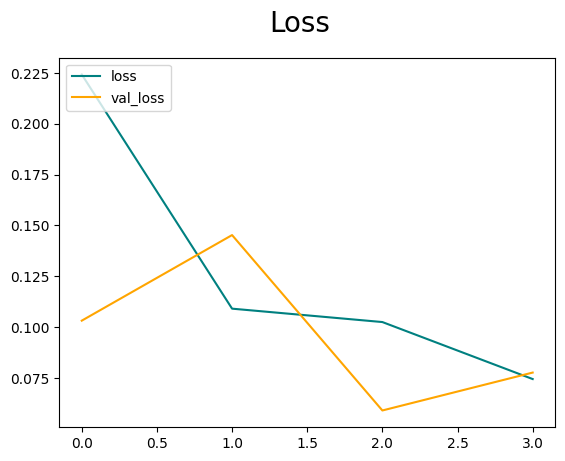

In [187]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

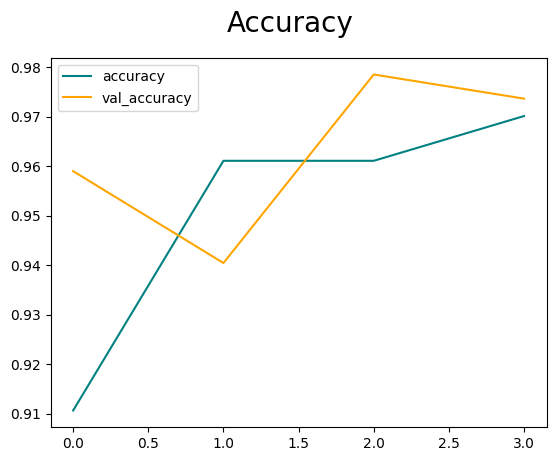

In [188]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Ewaluacja modelu

In [189]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [190]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [191]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    precysion.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 257ms/step


In [192]:
print(f'Precyzja:{precysion.result().numpy()}, Recall:{recall.result().numpy()}, Dokładność:{accuracy.result().numpy()}')

Precyzja:0.8999999761581421, Recall:0.957446813583374, Dokładność:0.958984375


# 10. Test

In [193]:
import cv2

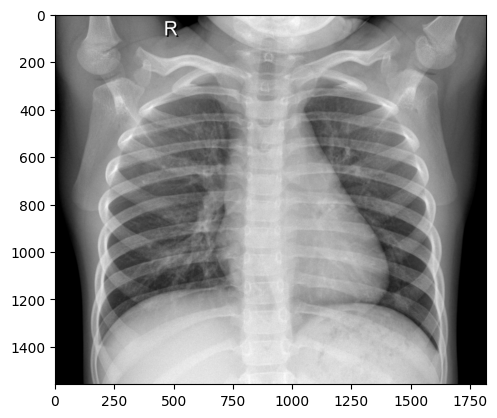

In [194]:
img = cv2.imread('zdrowy.jpeg')
plt.imshow(img)
plt.show()

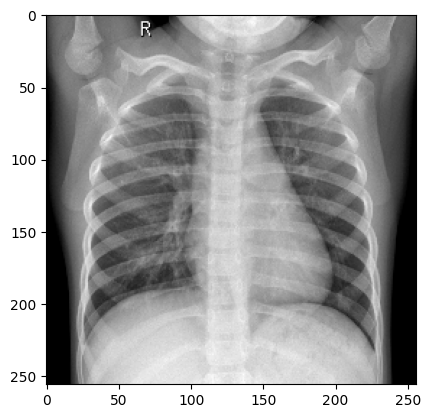

In [195]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [196]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 83ms/step


In [197]:
yhat

array([[0.99960154]], dtype=float32)

In [198]:
if yhat > 0.5: 
    print('Zdrowy')
else:
    print('Chory')

Zdrowy


In [200]:
from tensorflow.keras.models import load_model

In [201]:
model.save(os.path.join('models','magisterka.h5'))

In [204]:
new_model = load_model(os.path.join('models','magisterka.h5'))

In [205]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 76ms/step


array([[0.99960154]], dtype=float32)